In [23]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [24]:
import numpy as np

In [25]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#midterms since:2022-11-07 until:2022-11-24').get_items()):
    if i>3000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.sourceLabel, tweet.content, 
                                tweet.id, tweet.mentionedUsers])
    
# Creating a dataframe to load the list
df = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Source of Tweet", "Tweet", 
                                                "ID", "mentionedusers"])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_58948/562888463.py:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.sourceLabel, tweet.content,


In [26]:
df

,User,Date Created,Source of Tweet,Tweet,ID,mentionedusers
0,ScottStantis,2022-11-23 23:47:13+00:00,Twitter Web App,"Listening to ""Episode 76| November 23, 2022: Y...",1595564657808474112,None
1,BurDarius,2022-11-23 23:45:21+00:00,Twitter for iPhone,🙈🤯🤔🤨 @DNC #ArizonaElection #Arizona #Midterms2...,1595564190298685442,[https://twitter.com/DNC]
2,RankTheVoteKS,2022-11-23 23:36:03+00:00,Twitter Web App,Shortly after Alaskans used #RankedChoiceVotin...,1595561848820187141,None
3,AgainUSSANews,2022-11-23 23:19:36+00:00,Twitter Web App,#News #BreakingNews #Breaking #Trump #Biden #P...,1595557710531301376,None
4,FreedomActNow,2022-11-23 23:10:02+00:00,Loomly,Sign up at https://t.co/OrtFs7maWf to stay inv...,1595555300098150400,None
...,...,...,...,...,...,...
2996,PoliticsKulture,2022-11-16 16:07:14+00:00,ContentStudio.io,Watch Alex Wagner Tonight Highlights: Nov. 15 ...,1592912185281363970,None
2997,PoliticsKulture,2022-11-16 16:07:14+00:00,ContentStudio.io,...#DemocracyNotAutocracy #democracy #politics...,1592912184564396035,None
2998,mwcartoons,2022-11-16 16:06:13+00:00,Twitter Web App,The damaged candidate.\n#Trump is trying to be...,1592911929965940736,"[https://twitter.com/cartoonmovement, https://..."
2999,herboldmoveUSA,2022-11-16 16:03:21+00:00,Twitter for iPhone,Many #women won their #midterms! Who are you m...,1592911209258713088,"[https://twitter.com/Ruwa4Georgia, https://twi..."


In [27]:
df = df[['User', 'Date Created', 'mentionedusers']]

In [28]:
df['user_2'] = df['mentionedusers'][df['mentionedusers'].notnull()].apply(lambda x: x[0].username)

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_58948/3464019908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_2'] = df['mentionedusers'][df['mentionedusers'].notnull()].apply(lambda x: x[0].username)


In [29]:
df['user_2'] = df['user_2'].fillna(df['User'])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_58948/3119660080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_2'] = df['user_2'].fillna(df['User'])


In [30]:
df = df.drop(columns = ['mentionedusers'])

In [31]:
df['type'] = df.apply(lambda x: 'Retweet' if x.User != x.user_2 else 'Tweet', axis = 1)

In [32]:
df['type']

0         Tweet
1       Retweet
2         Tweet
3         Tweet
4         Tweet
         ...   
2996      Tweet
2997      Tweet
2998    Retweet
2999    Retweet
3000      Tweet
Name: type, Length: 3001, dtype: object

In [33]:
df.type.value_counts()

Tweet      2413
Retweet     588
Name: type, dtype: int64

In [34]:
df

,User,Date Created,user_2,type
0,ScottStantis,2022-11-23 23:47:13+00:00,ScottStantis,Tweet
1,BurDarius,2022-11-23 23:45:21+00:00,DNC,Retweet
2,RankTheVoteKS,2022-11-23 23:36:03+00:00,RankTheVoteKS,Tweet
3,AgainUSSANews,2022-11-23 23:19:36+00:00,AgainUSSANews,Tweet
4,FreedomActNow,2022-11-23 23:10:02+00:00,FreedomActNow,Tweet
...,...,...,...,...
2996,PoliticsKulture,2022-11-16 16:07:14+00:00,PoliticsKulture,Tweet
2997,PoliticsKulture,2022-11-16 16:07:14+00:00,PoliticsKulture,Tweet
2998,mwcartoons,2022-11-16 16:06:13+00:00,cartoonmovement,Retweet
2999,herboldmoveUSA,2022-11-16 16:03:21+00:00,Ruwa4Georgia,Retweet


In [35]:
df = df.loc[:, ['User', 'user_2', 'Date Created', 'type']]

In [36]:
df = df.rename(columns = {'User': 'user1', 'user_2': 'user2', 'Date Created': 'date'})

In [37]:
network_df = df

In [38]:
network_df

,user1,user2,date,type
0,ScottStantis,ScottStantis,2022-11-23 23:47:13+00:00,Tweet
1,BurDarius,DNC,2022-11-23 23:45:21+00:00,Retweet
2,RankTheVoteKS,RankTheVoteKS,2022-11-23 23:36:03+00:00,Tweet
3,AgainUSSANews,AgainUSSANews,2022-11-23 23:19:36+00:00,Tweet
4,FreedomActNow,FreedomActNow,2022-11-23 23:10:02+00:00,Tweet
...,...,...,...,...
2996,PoliticsKulture,PoliticsKulture,2022-11-16 16:07:14+00:00,Tweet
2997,PoliticsKulture,PoliticsKulture,2022-11-16 16:07:14+00:00,Tweet
2998,mwcartoons,cartoonmovement,2022-11-16 16:06:13+00:00,Retweet
2999,herboldmoveUSA,Ruwa4Georgia,2022-11-16 16:03:21+00:00,Retweet


# Social Media Analysis

In [39]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [40]:
def gen_graph(network_df):
    rt_in = network_df.type=='Retweet'
    rts = network_df[rt_in]
    tweets = network_df.drop(index= rts.index)
    graph = nx.DiGraph()
    graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
    graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')
    return graph

In [41]:
graph = gen_graph(network_df)

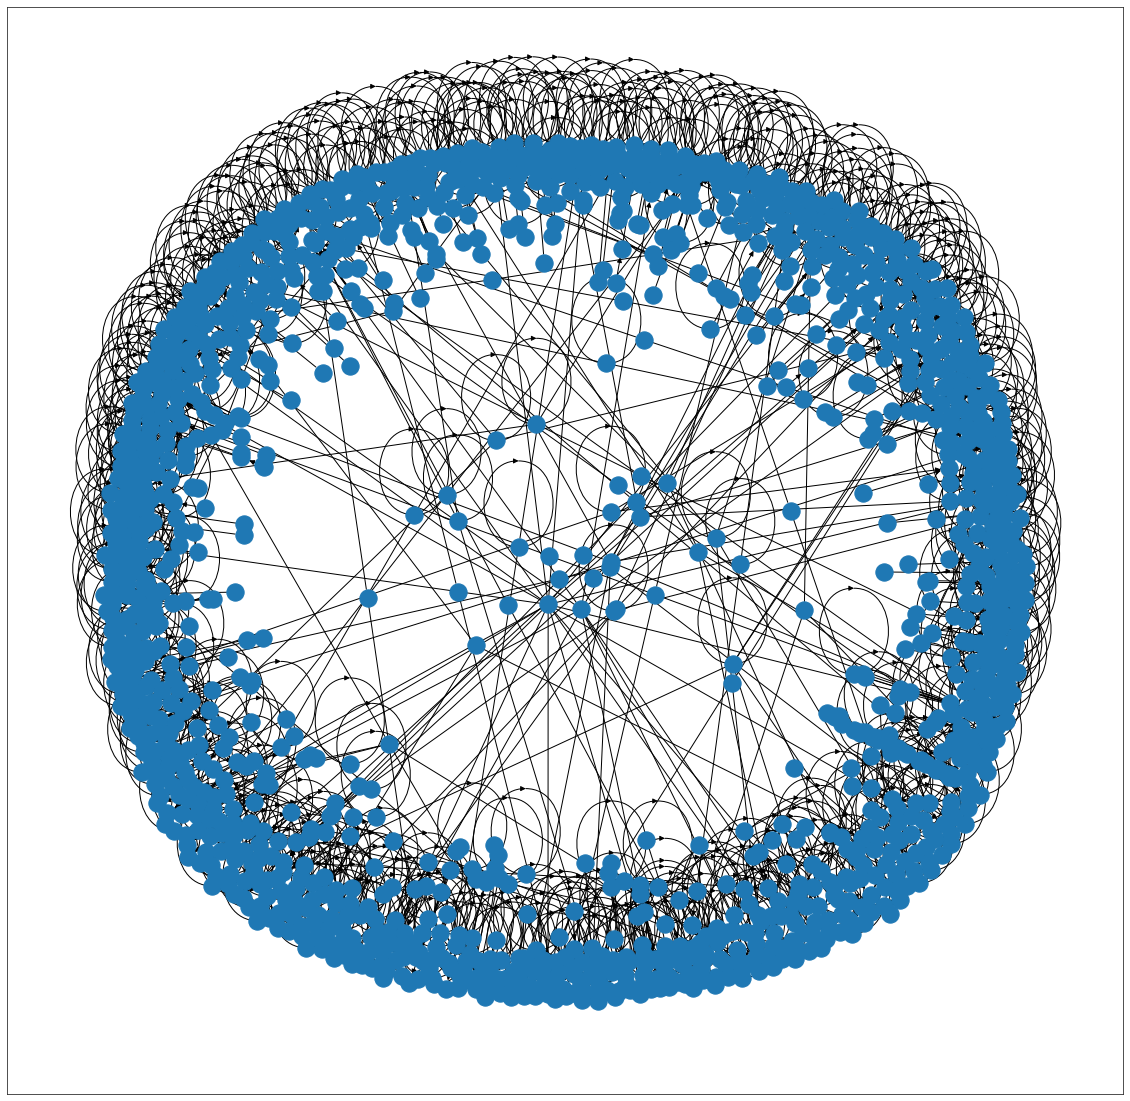

In [42]:
sns.set_style("white")
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.show()

In [43]:
def network_feat(graph):
    df = {
        'in-degree_centrality': pd.Series(nx.algorithms.centrality.in_degree_centrality(graph)),
        'out-degree_centrality': pd.Series(nx.algorithms.centrality.out_degree_centrality(graph)),
        'betweeness_centrality': pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)),
        'eigenvector_centrality': pd.Series(nx.algorithms.centrality.eigenvector_centrality(graph)),
        'closeness': pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph.reverse())),
        'pagerank': pd.Series(nx.pagerank(graph, alpha=0.8))
    }
    
    return pd.concat(df, axis=1)

In [44]:
overall_feats = network_feat(graph)

In [45]:
overall_feats

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness,pagerank
BurDarius,0.000000,0.000706,0.0,1.336214e-07,0.000706,0.000233
DNC,0.001412,0.000000,0.0,3.503046e-02,0.000000,0.000464
NateAdams5k,0.000000,0.013418,0.0,1.336214e-07,0.013418,0.000233
KariLake,0.009887,0.000000,0.0,7.008484e-02,0.000000,0.001970
drturnerlee,0.000000,0.000706,0.0,1.336214e-07,0.000706,0.000233
...,...,...,...,...,...,...
Robert4787,0.000706,0.000706,0.0,3.502806e-02,0.000000,0.001161
GOPTurnTable,0.000706,0.000706,0.0,3.502806e-02,0.000000,0.001161
ed_george_,0.000706,0.000706,0.0,3.502806e-02,0.000000,0.001161
JamesPower91,0.000706,0.000706,0.0,3.502806e-02,0.000000,0.001161


<AxesSubplot:xlabel='pagerank', ylabel='Density'>

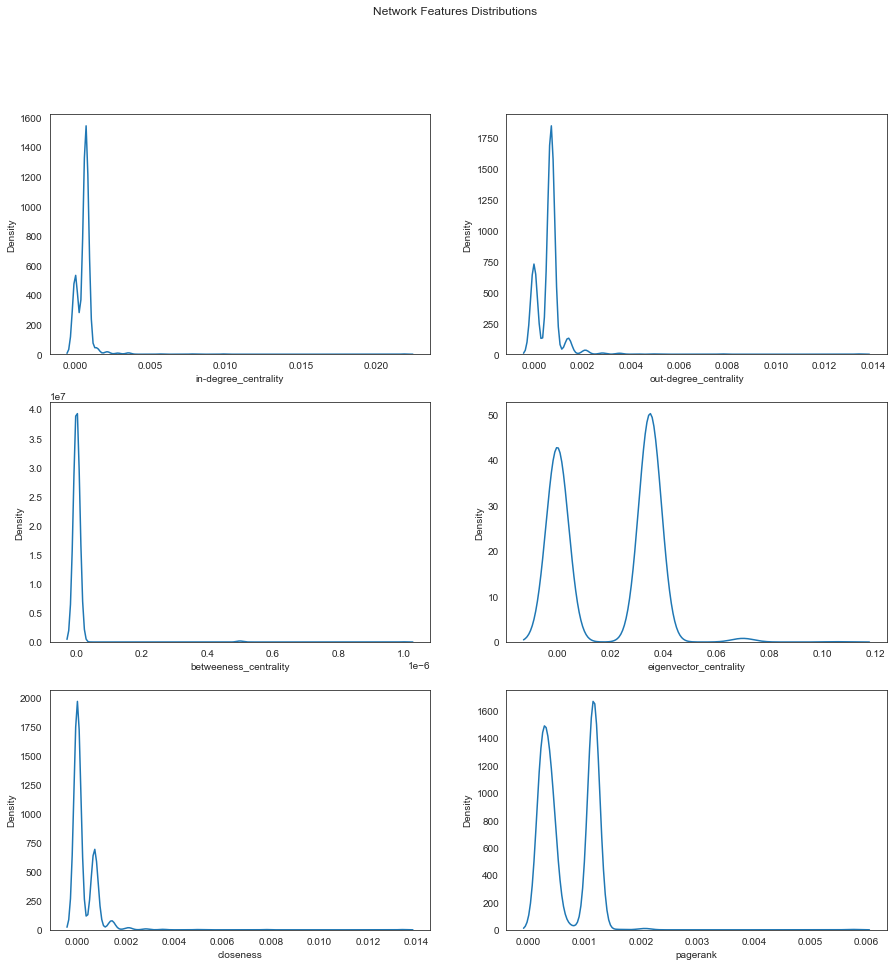

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
 
fig.suptitle('Network Features Distributions')

sns.kdeplot(ax=axes[0, 0], data=overall_feats, x='in-degree_centrality')
sns.kdeplot(ax=axes[0, 1], data=overall_feats, x='out-degree_centrality')
sns.kdeplot(ax=axes[1, 0], data=overall_feats, x='betweeness_centrality')
sns.kdeplot(ax=axes[1, 1], data=overall_feats, x='eigenvector_centrality')
sns.kdeplot(ax=axes[2, 0], data=overall_feats, x='closeness')
sns.kdeplot(ax=axes[2, 1], data=overall_feats, x='pagerank')

In [64]:
network_df['user2'].value_counts().head(50)

PoliticsKulture    1224
TheMAGAWatch         94
kk131066             51
darkmoneybot         32
YouTube              31
SPABG2               23
GreenhouseEffe8      18
AgainUSSANews        18
KariLake             16
papernewsnetwrk      11
titrespresse         11
GOP                  11
10WallStreet         11
TruthWins26          10
crypticvalentin       9
elonmusk              9
USofEd                9
pamp00vey             9
MorningConsult        9
JoeBiden              8
truthtsar             7
SchaepdryverB         7
Jim_Jordan            7
RedWaveClips          6
FoulBallPodcast       6
FoxNews               6
NoticiasMundo23       6
alwayscanada          6
billgatesaz           6
POTUS                 6
wtxnewsusa            5
CorentinSellin        5
laurenboebert         5
ReneNow               5
LeaderMcConnell       5
Mystime               5
Lesjoursfr            5
KylerAGrant           5
OneVenusThrow         5
EpochTimesFR          5
tetsumonchi           5
joekent16jan19  

# Betweeness centrality

In [70]:
overall_feats.nlargest(10, 'betweeness_centrality')['betweeness_centrality']

BruceBourgoine    9.981833e-07
newpoliticsAU     4.990917e-07
CAIRNational      4.990917e-07
mwcartoons        4.990917e-07
benryanwriter     4.990917e-07
JimHuangCFA       4.990917e-07
srfnews           4.990917e-07
BurDarius         0.000000e+00
DNC               0.000000e+00
NateAdams5k       0.000000e+00
Name: betweeness_centrality, dtype: float64

# Out-degree centrality

In [71]:
overall_feats.nlargest(10, 'out-degree_centrality')['out-degree_centrality']

NateAdams5k        0.013418
MRowe57            0.007768
rservant7910       0.004944
RedWaveClips       0.004237
NoDSANY            0.003531
RHCommonBridge     0.003531
TruthWins26        0.003531
RichWritesRants    0.003531
OneLadyOneVote     0.002825
SandraNavidi       0.002825
Name: out-degree_centrality, dtype: float64

# Eigenvector centrality

In [69]:
overall_feats.nlargest(10, 'eigenvector_centrality')['eigenvector_centrality']

Jim_Jordan         0.105089
YouTube            0.070126
KariLake           0.070085
LeaderMcConnell    0.070063
ReverendWarnock    0.070056
jrpsaki            0.070056
HawleyMO           0.070056
BruceBourgoine     0.070056
tampafreepress     0.070056
CasMudde           0.070056
Name: eigenvector_centrality, dtype: float64

# Closeness

In [68]:
overall_feats.nlargest(10, 'closeness') ['closeness']

NateAdams5k        0.013418
MRowe57            0.007768
rservant7910       0.004944
RichWritesRants    0.003531
RedWaveClips       0.003531
NoDSANY            0.002825
RHCommonBridge     0.002825
TruthWins26        0.002825
SharpandCreased    0.002825
LeMonde_EN         0.002119
Name: closeness, dtype: float64

# Pagerank

In [67]:
overall_feats.nlargest(10, 'pagerank') ['pagerank']

YouTube           0.005733
CasMudde          0.002089
ChicagoCouncil    0.002089
NCPolicyWatch     0.002089
KariLake          0.001970
GOP               0.001613
spreaker          0.001314
elonmusk          0.001259
tampafreepress    0.001245
DoBigThings       0.001161
Name: pagerank, dtype: float64

# In-degree centrality

In [65]:
overall_feats.nlargest(10, 'in-degree_centrality') ['in-degree_centrality']

YouTube            0.021893
KariLake           0.009887
GOP                0.007768
elonmusk           0.005650
spreaker           0.003531
laurenboebert      0.003531
POTUS              0.003531
FoxNews            0.003531
Jim_Jordan         0.003531
LeaderMcConnell    0.003531
Name: in-degree_centrality, dtype: float64

# Closeness centrality

In [66]:
pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph)).nlargest(10)

YouTube            0.021893
KariLake           0.009887
GOP                0.007768
elonmusk           0.005650
spreaker           0.003632
laurenboebert      0.003531
POTUS              0.003531
FoxNews            0.003531
Jim_Jordan         0.003531
LeaderMcConnell    0.003531
dtype: float64